In [1]:
from keras.models import Sequential
from keras.layers import Dense
import keras.layers as L
import keras
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import glob

import glob
import os 
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter, FixedLocator
import matplotlib.ticker as mtick

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Files Processing

In [3]:
Colour_data_size = 4416*5664 # size of the colour data
Insitu_data_size = 1 # size of the insitu data
Input_data_size = Colour_data_size + Insitu_data_size

In [4]:
historic_path = '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData'

In [5]:
# list all files in the data folder
files = [f for f in glob.glob(historic_path + "/*.nc", recursive=True)]

In [6]:
files = sorted(files)
files

['/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/07.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/08.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/09.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/13.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/16.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/18.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/20.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/21.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/22.07.2018.nc',
 '/Users/macbook/Desktop/UpWork/CHL level prediction/historicData/24.07.2018.nc']

# Current Model

In [32]:
model_current=Sequential()
model_current.add(Dense(1, input_dim=Input_data_size, activation='relu'))
model_current.add(Dense(Colour_data_size, activation='sigmoid'))

# Compile the model
model_current.compile(loss='mse', optimizer='adam', metrics=['mape'])

In [33]:
# Train the model on all of the available data files
for e in range(epochs):
    for i in range(len(files)-1):
        try:
            input_data = Dataset(files[i])         # model input (colour data at t=n)
            output_data = Dataset(files[i+1])	   # model output (colour data at t=n+1)

            # this is X (colour data)
            CHL_levels = input_data.variables["CHL"][0].data.reshape(1,-1)
            CHL_levels[CHL_levels==np.min(CHL_levels)] == 0

            # this should be replaced by the insitu data input
            insitu_data = np.random.rand(Insitu_data_size)

            # concatenate colour data and insitu data to create one array of feature inputs
            X = np.append(CHL_levels,insitu_data)

            # this is the desired output (colour data for the next day)
            CHL_levels_Y = output_data.variables["CHL"][0].data.reshape(1,-1)
            CHL_levels_Y[CHL_levels_Y==np.min(CHL_levels_Y)] == 0

            #Fit the model to the data
            model_current.fit(np.expand_dims(X,axis=0), CHL_levels_Y, epochs=1, batch_size=1)
        except:
            pass

Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 272612.6875 - mape: 256.5472
Epoch 1/1
1/1 [==============================] - 4s 4s/step - loss: 272611.3125 - mape: 254.7769
Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 272611.1875 - mape: 254.8166
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 272611.2188 - mape: 243.4128
Epoch 1/1
1/1 [==============================] - 1s 1s/step - loss: 272610.9688 - mape: 264.9102
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 272611.0938 - mape: 278.5309
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 272611.0625 - mape: 270.1370
Epoch 1/1
1/1 [==============================] - 2s 2s/step - loss: 272610.5625 - mape: 269.5413
Epoch 1/1
1/1 [==============================] - 3s 3s/step - loss: 272610.6875 - mape: 261.5023


# Model

In [41]:
model = Sequential()
model.add(L.InputLayer([1]))
model.add(L.Dense(10, activation = 'relu'))
model.add(L.Dense(5, activation = 'relu'))
model.add(L.Dense(1))
model.compile(loss = 'mse', optimizer = 'adam', metrics=['mape'])

### Training model on all data to get neural net ready for prediction

In [ ]:
for i in range(len(files)-2): #-2 because we keep last date to check model performance
    try:
        input_data = Dataset(files[i])         # model input (colour data at t=n)
        output_data = Dataset(files[i+1])   # model output (colour data at t=n+1)
            
        # this is X (colour data)
        CHL_levels = input_data.variables["CHL"][0].data.reshape(1,-1)
        # this should be replaced by the insitu data input
        insitu_data = np.random.rand(Insitu_data_size)
        # concatenate colour data and insitu data to create one array of feature inputs
        X = np.append(CHL_levels,insitu_data)
            
        # this is the desired output (colour data for the next day)
        CHL_levels_Y = output_data.variables["CHL"][0].data.reshape(1,-1)
        CHL_levels_Y = np.append(CHL_levels_Y,insitu_data)
        print('')
        print('Training model on {} and {} data'.format(files[i][-13:-3], files[i+1][-13:-3]))
        #print('_'*50)
        #Fit the model to the data
        model.fit(X, CHL_levels_Y, epochs=2, batch_size=1000)
    except:
        pass


Training model on 07.07.2018 and 08.07.2018 data
Epoch 1/2
 6457000/25012225 [======>.......................] - ETA: 43s - loss: 0.4877 - mape: 18.6060

# Test prediction

#### Getting data for the date *before* the day we'd like to predict

In [43]:
input_data = Dataset(files[-2])            

# colour data
CHL_levels_t = input_data.variables["CHL"][0].data.reshape(1,-1)
CHL_levels_t[CHL_levels_t==np.min(CHL_levels_t)] == 0

# this should be replaced by the insitu data input
insitu_data = np.random.rand(Insitu_data_size)
            
# concatenate colour data and insitu data to create one array of feature inputs
X = np.append(CHL_levels_t,insitu_data)

In [44]:
forecast = model.predict(X)
forecast.shape

(25012225, 1)

#### Getting original data for the last date  to compare forecasted values and ground_truth

In [45]:
last_date_data = Dataset(files[-1])
CHL_last_date = last_date_data.variables["CHL"][0].data.reshape(1,-1)
CHL_last_date = np.append(CHL_last_date,insitu_data)

In [52]:
test_table = pd.DataFrame({'CHL_last_date':CHL_last_date,
                          'CHL_forecast':forecast.reshape(1,-1)[0]})
test_table['delta'] = test_table['CHL_forecast'] - test_table['CHL_last_date']
test_table['error_percent'] = test_table['delta']/test_table['CHL_last_date']*100

error = test_table[test_table['CHL_last_date'] != -999]['error_percent'].abs().mean()
print('Mean absolute error: {}%'.format(round(error,2)))

Mean absolute error: 25.23%


#### Plotting errors distribution

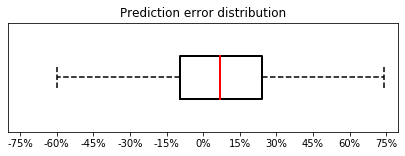

In [55]:
plot_data = test_table[test_table['CHL_last_date'] != -999]['error_percent']
fig, ax = plt.subplots(figsize=(7,2))
ax.set_title('Prediction error distribution')
ax.boxplot(plot_data, showfliers=False, vert=False, widths=[0.4], 
           boxprops = dict(linewidth=2, color='black'),
           whiskerprops = dict(linewidth=1.5, color='black', linestyle='--'),
           capprops = dict(linewidth=1.5, color='black', linestyle='--'),
           medianprops=dict(linewidth=2, color='red'))
ax.set_xlim(-80,80)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.tick_params(axis='y',left=False,labelleft=False)

#### Getting coordinates

In [ ]:
lats_t = last_date_data.variables["lat"][:].data.reshape(1,-1)[0]
lons_t = last_date_data.variables["lon"][:].data.reshape(1,-1)[0]
lat = []
lon = []
for i in range(0, 4416):
    lat.extend([lats_t[i]]*5664)
    lon.extend(lons_t)
map_data = pd.DataFrame({'lat':lat,
                         'lon':lon})
map_data.shape

In [ ]:
test_table = pd.concat([test_table, map_data], axis=1)

In [ ]:
test_table.shape

# Mapping

In [ ]:
from keplergl import KeplerGl

In [ ]:
# here we use every 20th value to optimize mapping process
kepler_pred = test_table[['CHL_forecast','lat','lon']].loc[::20,:]
kepler_true  = test_table[['CHL_last_date','lat','lon']].loc[::20,:]

In [ ]:
# pulling map config file
%run map_config.py

In [ ]:
map = KeplerGl(height=800, data={'data_pred': kepler_pred, 'data_true':kepler_true}, config=config)
map

In [ ]:
#with open('map_config.py', 'w') as f:
    #f.write('config = {}'.format(map.config))

In [ ]:
#map.save_to_html(data={'data_pred': kepler_pred, 'data_true':kepler_true}, file_name='CHL_level_map.html')